<a href="https://colab.research.google.com/github/sadhiika/digit-recognizer/blob/main/digit_recognizer_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

In [13]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])



In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

# Save the model
model.save('mnist_cnn_model.h5')

Epoch 1/5
750/750 [==============================] - 49s 63ms/step - loss: 0.2161 - accuracy: 0.9347 - val_loss: 0.0693 - val_accuracy: 0.9799
Epoch 2/5
750/750 [==============================] - 47s 62ms/step - loss: 0.0593 - accuracy: 0.9816 - val_loss: 0.0557 - val_accuracy: 0.9837
Epoch 3/5
750/750 [==============================] - 44s 59ms/step - loss: 0.0418 - accuracy: 0.9867 - val_loss: 0.0461 - val_accuracy: 0.9852
Epoch 4/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0329 - accuracy: 0.9891 - val_loss: 0.0440 - val_accuracy: 0.9886
Epoch 5/5
313/313 [==============================] - 4s 14ms/step - loss: 0.0400 - accuracy: 0.9875
Test accuracy: 0.9875


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving six.png to six.png
1/1 [==============================] - 0s 230ms/step


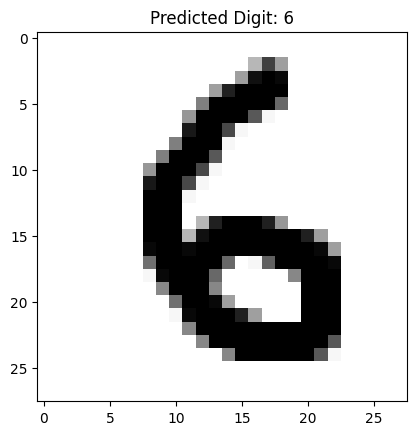

The predicted digit is: 6


In [17]:
# Function to load, preprocess, and predict digit from input image
def predict_digit(img_path):
    # Load the image
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels
    img_array = np.array(img)  # Convert to numpy array
    img_array = img_array.reshape(1, 28, 28, 1).astype('float32') / 255  # Reshape and normalize

    # Predict the digit
    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)

    # Display the image and prediction
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Digit: {predicted_digit}')
    plt.show()

    return predicted_digit

# Upload the image
uploaded = files.upload()

# Get the path to the uploaded image
img_path = next(iter(uploaded))

# Predict the digit in the uploaded image
predicted_digit = predict_digit(img_path)
print(f'The predicted digit is: {predicted_digit}')